In [1]:
#! pip install nibabel nipype -U

In [2]:
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np

In [3]:
import warnings

warnings.filterwarnings("ignore")

In [4]:
path = "./Task04_Hippocampus/3d_fullres"

run_data = [
    "A40/22933937",
    "A100/22933910",
    "A100/22969078",
    "A100/22972197",
    "A100/22972221",
]

results = []

In [5]:
import nipype.algorithms.metrics

# Calculate dice score
for run in run_data:

    run_info = {}

    overlap = nipype.algorithms.metrics.Overlap()
    # Ground Truth
    overlap.inputs.volume1 = (
        "./Task04_Hippocampus/ground_truth/labelsTr/hippocampus_017.nii.gz"
    )
    # Run data
    overlap.inputs.volume2 = (
        "%s/%s/results/fold_0/validation_raw_postprocessed/hippocampus_017.nii.gz"
        % (path, run)
    )
    res = overlap.run()
    score = res.outputs.dice

    run_info["path"] = run
    run_info["dice_score"] = score
    results.append(run_info)

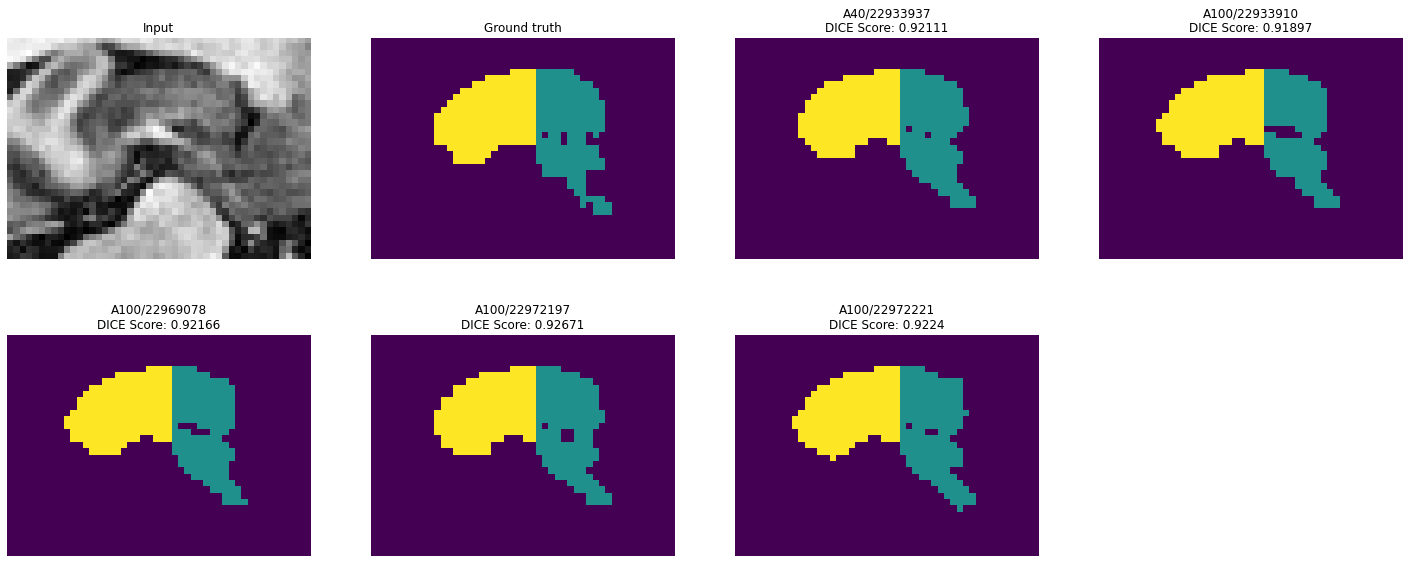

In [6]:
layer = 15

# Calculate the number of rows based on the size of results + 2 (input & ground truth)
# and the value of n_cols
n_cols = 4
n_rows = int(np.ceil((len(results) + 2) / n_cols))

# Define the number of rows and columns and set the graph size
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(25, n_rows * 5))

# Hide the graph axes
for ax in axes.flatten():
    ax.axis("off")

# Display the input image as the first image
axes[0, 0].imshow(
    nib.load(
        "./Task04_Hippocampus/ground_truth/imagesTr/hippocampus_017_0000.nii.gz"
    ).get_fdata()[:, :, layer],
    cmap="gray",
)
axes[0, 0].set_title("Input")

# Display the ground truth as the second image
axes[0, 1].imshow(
    nib.load(
        "./Task04_Hippocampus/ground_truth/labelsTr/hippocampus_017.nii.gz"
    ).get_fdata()[:, :, layer]
)
axes[0, 1].set_title("Ground truth")


for i, result in enumerate(results):
    image_path = (
        "%s/%s/results/fold_0/validation_raw_postprocessed/hippocampus_017.nii.gz"
        % (path, result["path"])
    )

    # Use i + 2 instead of i because of the input image and the ground truth always being the first 2 images

    # Calculate the row number by dividing the list item number by the number of columns and rounding down
    row = int(np.floor((i + 2) / n_cols))
    # Calculate the column number by finding the remainder of the list item number divided by the number of columns
    column = int(np.remainder((i + 2), n_cols))

    # Display the 15th layer of the image
    axes[row, column].imshow(nib.load(image_path).get_fdata()[:, :, layer])
    axes[row, column].set_title(
        "%s\nDICE Score: %s" % (result["path"], result["dice_score"])
    )